In [1]:
import sys
sys.path.append('../scripts')

In [2]:
import logging
import glob
import pandas as pd
import nltk
import os

import gensim
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models.callbacks import PerplexityMetric
from gensim.models.wrappers import LdaMallet
from utils import is_punct

TOKENIZER = nltk.tokenize.word_tokenize

In [3]:
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO

In [4]:
CORPUS_PATH = '../corpus/txt-timeset/*.txt'
stop_words_path = '../stoplists/stoplist_original.txt'
stop_words = [s.lower() for s in open(stop_words_path, 'r', encoding='utf-8').read().splitlines()]

NO_BELOW = 2 #minimum document frequency
NO_ABOVE = 1 #maximum document frequency

N_TOPICS = 50
ITERATIONS = 2000
OPTIMIZE_INTERVAL = 20
EVAL_EVERY = 3 # for regular LDA 
N_WORKERS = 3 # number of CPU'S for multiprocessing

In [7]:
stop_words

['en',
 'die',
 'in',
 'de',
 'van',
 'dat',
 'u',
 'een',
 'met',
 "'t",
 'is',
 'mijn',
 'niet',
 'ick',
 'te',
 'den',
 'hy',
 'my',
 'het',
 'al',
 'op',
 'ons',
 'als',
 'ghy',
 '’',
 'zijn',
 'tot',
 'daer',
 'haer',
 'voor',
 'om',
 'soo',
 'sijn',
 'hem',
 'door',
 'sy',
 'sal',
 'maer',
 'ik',
 'dan',
 'heeft',
 't',
 'gy',
 'nu',
 'wat',
 'o',
 'wel',
 'hier',
 'want',
 'uw',
 'aen',
 'wy',
 'wilt',
 'dit',
 'noch',
 'by',
 'hoe',
 'of',
 'geen',
 'der',
 'myn',
 'na',
 'was',
 'moet',
 'uyt',
 'v',
 'men',
 'oock',
 'des',
 '‘',
 'laet',
 'seer',
 'alle',
 'doet',
 'wil',
 'veel',
 'doen',
 'zy',
 'so',
 'ende',
 'waer',
 'doch',
 'kan',
 'eer',
 'end',
 'groot',
 'siet',
 'meer',
 'haar',
 'daar',
 'schoon',
 'dus',
 'komt',
 'hebt',
 'gaen',
 'zijt',
 'vol',
 'eens',
 'zyn',
 'maar',
 'wie',
 'sonder',
 "'k",
 'goet',
 'ten',
 "'s",
 'd',
 'ter',
 'soet',
 'dees',
 'aan',
 'ben',
 'gaet',
 'uwen',
 'wesen',
 'naer',
 'syn',
 'heb',
 'zal',
 'nae',
 'uwe',
 'zoo',
 'staet',

In [5]:
remove_stopwords = lambda x: [word.lower() for word in x if word.lower() not in stop_words and not is_punct(word) and len(word) > 1]

texts = glob.glob(CORPUS_PATH, recursive=False)
tokenized_texts = [TOKENIZER(open(text, "r", encoding="utf-8").read(), language="dutch") for text in texts]
tokenized_texts = [remove_stopwords(text) for text in tokenized_texts]

In [7]:
texts[1]

'Corpus/txt-timeset/3644.txt'

In [6]:
dictionary = Dictionary(tokenized_texts)
dictionary.filter_extremes(no_below=NO_BELOW, no_above=NO_ABOVE)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

INFO : adding document #0 to Dictionary(0 unique tokens: [])
INFO : adding document #10000 to Dictionary(134551 unique tokens: ['aards', 'aartsverraders', 'af', 'binden', 'blixemvuur']...)
INFO : adding document #20000 to Dictionary(203771 unique tokens: ['aards', 'aartsverraders', 'af', 'binden', 'blixemvuur']...)
INFO : built Dictionary(217719 unique tokens: ['aards', 'aartsverraders', 'af', 'binden', 'blixemvuur']...) from 22297 documents (total 3277518 corpus positions)
INFO : discarding 127728 tokens: [('aartsverraders', 1), ('blixemvuur', 1), ('bruissend', 1), ('gadeslaan', 1), ('hemelvieren', 1), ('ghesondicheit', 1), ('toekommenden', 1), ('prijcek', 1), ('koutheydt', 1), ('meghedeylt', 1)]...
INFO : keeping 89991 tokens which were in no less than 2 and no more than 22297 (=100.0%) documents
INFO : resulting dictionary: Dictionary(89991 unique tokens: ['aards', 'af', 'binden', 'dag', 'durft']...)


In [9]:
lda = LdaMallet('/Users/alielassche/applications/mallet-2.0-4.8/bin/mallet', 
                corpus=corpus,
                id2word=dictionary,
                num_topics=N_TOPICS, 
                iterations=ITERATIONS,  
                workers=N_WORKERS,
                optimize_interval=OPTIMIZE_INTERVAL)

INFO : serializing temporary corpus to /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/6cb390_corpus.txt
INFO : converting temporary corpus to MALLET format with /Users/alielassche/applications/mallet/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/6cb390_corpus.txt --output /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/6cb390_corpus.mallet
INFO : training MALLET LDA with /Users/alielassche/applications/mallet/bin/mallet train-topics --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/6cb390_corpus.mallet --num-topics 50  --alpha 50 --optimize-interval 20 --num-threads 3 --output-state /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/6cb390_state.mallet.gz --output-doc-topics /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/6cb390_doctopics.txt --output-topic-keys /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/6cb390_topickeys.txt --num-iterations 2000 --inferencer-filename

In [10]:
from gensim.models import CoherenceModel

# Compute Coherence score
coherence_model_ldamallet = CoherenceModel(model=lda, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO : 1 batches submitted to accumulate stats from 64 documents (2179 virtual)
INFO : 2 batches submitted to accumulate stats from 128 documents (4863 virtual)
INFO : 3 batches submitted to accumulate stats from 192 documents (6027 virtual)
INFO : 4 batches submitted to accumulate stats from 256 documents (9276 virtual)
INFO : 5 batches submitted to accumulate stats from 320 documents (11750 virtual)
INFO : 6 batches submitted to accumulate stats from 384 documents (15910 virtual)
INFO : 7 batches submitted to accumulate stats from 448 documents (19257 virtual)
INFO : 8 batches submitted to accumulate stats from 512 documents (19812 virtual)
INFO : 9 batches submitted to accumulate stats from 576 documents (22249 virtual)
INFO : 10 batches submitted to accumulate stats from 640 documents (24974 virtual)
INFO : 11 batches submitted to accumulate stats from 704 docum

INFO : 97 batches submitted to accumulate stats from 6208 documents (239011 virtual)
INFO : 98 batches submitted to accumulate stats from 6272 documents (242362 virtual)
INFO : 99 batches submitted to accumulate stats from 6336 documents (245616 virtual)
INFO : 100 batches submitted to accumulate stats from 6400 documents (246530 virtual)
INFO : 101 batches submitted to accumulate stats from 6464 documents (249033 virtual)
INFO : 102 batches submitted to accumulate stats from 6528 documents (251892 virtual)
INFO : 103 batches submitted to accumulate stats from 6592 documents (254773 virtual)
INFO : 104 batches submitted to accumulate stats from 6656 documents (257445 virtual)
INFO : 105 batches submitted to accumulate stats from 6720 documents (259664 virtual)
INFO : 106 batches submitted to accumulate stats from 6784 documents (261683 virtual)
INFO : 107 batches submitted to accumulate stats from 6848 documents (263982 virtual)
INFO : 108 batches submitted to accumulate stats from 691

INFO : 192 batches submitted to accumulate stats from 12288 documents (465791 virtual)
INFO : 193 batches submitted to accumulate stats from 12352 documents (468450 virtual)
INFO : 194 batches submitted to accumulate stats from 12416 documents (470797 virtual)
INFO : 195 batches submitted to accumulate stats from 12480 documents (472529 virtual)
INFO : 196 batches submitted to accumulate stats from 12544 documents (473535 virtual)
INFO : 197 batches submitted to accumulate stats from 12608 documents (476106 virtual)
INFO : 198 batches submitted to accumulate stats from 12672 documents (477445 virtual)
INFO : 199 batches submitted to accumulate stats from 12736 documents (479410 virtual)
INFO : 200 batches submitted to accumulate stats from 12800 documents (481539 virtual)
INFO : 201 batches submitted to accumulate stats from 12864 documents (485266 virtual)
INFO : 202 batches submitted to accumulate stats from 12928 documents (486516 virtual)
INFO : 203 batches submitted to accumulate 

INFO : 287 batches submitted to accumulate stats from 18368 documents (695028 virtual)
INFO : 288 batches submitted to accumulate stats from 18432 documents (698652 virtual)
INFO : 289 batches submitted to accumulate stats from 18496 documents (700310 virtual)
INFO : 290 batches submitted to accumulate stats from 18560 documents (701634 virtual)
INFO : 291 batches submitted to accumulate stats from 18624 documents (704105 virtual)
INFO : 292 batches submitted to accumulate stats from 18688 documents (708288 virtual)
INFO : 293 batches submitted to accumulate stats from 18752 documents (710791 virtual)
INFO : 294 batches submitted to accumulate stats from 18816 documents (712880 virtual)
INFO : 295 batches submitted to accumulate stats from 18880 documents (715151 virtual)
INFO : 296 batches submitted to accumulate stats from 18944 documents (717464 virtual)
INFO : 297 batches submitted to accumulate stats from 19008 documents (720485 virtual)
INFO : 298 batches submitted to accumulate 


Coherence Score:  0.5096587772145854


In [7]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet('/Users/alielassche/applications/mallet-2.0-4.8/bin/mallet', corpus=corpus, num_topics=num_topics, id2word=dictionary, iterations=ITERATIONS,  
                workers=N_WORKERS, optimize_interval=OPTIMIZE_INTERVAL)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [8]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_texts, start=10, limit=110, step=10)

INFO : serializing temporary corpus to /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/caa2ec_corpus.txt
INFO : converting temporary corpus to MALLET format with /Users/alielassche/applications/mallet-2.0-4.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/caa2ec_corpus.txt --output /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/caa2ec_corpus.mallet
INFO : training MALLET LDA with /Users/alielassche/applications/mallet-2.0-4.8/bin/mallet train-topics --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/caa2ec_corpus.mallet --num-topics 10  --alpha 50 --optimize-interval 20 --num-threads 3 --output-state /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/caa2ec_state.mallet.gz --output-doc-topics /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/caa2ec_doctopics.txt --output-topic-keys /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/caa2ec_topickeys.txt --num-iterations 2000 --inf

KeyboardInterrupt: 

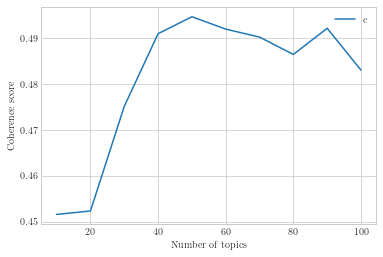

In [261]:
# Show graph
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

limit=110; start=10; step=10;
x = range(start, limit, step)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
#plt.savefig('coherence_values_2_10_100.pdf')

In [11]:
rows = []
for topic in range(0, N_TOPICS):
    words = lda.show_topic(topic)
    topic_n_words = ' '.join([word[0] for word in words])
    print('Topic {}: {}'.format(str(topic), topic_n_words))
    rows.append([str(topic), topic_n_words])
keys = pd.DataFrame(rows, columns=['topic', 'words'])

Topic 0: zo uit zich ook ziet waar laat naar zelf nooit
Topic 1: lof maria hemels godt moeder godts boven reyn bruydegom schoone
Topic 2: ook god heer kerk godes goods volk werd deur christus
Topic 3: ach hert lief min ziel pijn leven och hart smert
Topic 4: heer godt heere vader lof onse naem herten geest onsen
Topic 5: hun godt leeven gaat vrolyk laat quaat waar geeven weesen
Topic 6: ic lief es ooc moeder vader god ruyter man miin
Topic 7: godt kindt stal kindeken nieuwe moeder kint iaer geboren mensch
Topic 8: hart wiens gelijk sich ook er word waar n't wijl
Topic 9: god laat uit leeven heer naa goed gods waar hert
Topic 10: prins jn jck graef paus soldaten schepen stadt onse spaensche
Topic 11: heer godt se hen wt sullen doer ouer dies n't
Topic 12: herder vee groene harder coridon herders schaepjes herderin soete ey
Topic 13: man neen weet mee ander sou staen gelt maeckt huys
Topic 14: quam sprack sagh riep liet doe nam gaf gingh sey
Topic 15: hemels heer god godes sint hart good

In [12]:
keys.to_csv('original_keys.csv', sep='\t')

In [13]:
transformed_docs = lda.load_document_topics()
docs = [[texts[indx]] + [p[1] for p in doc] for indx, doc in enumerate(transformed_docs)]
composition = pd.DataFrame(docs, columns=['document_id'] + ['topic {}'.format(x) for x in range(0, N_TOPICS)])

In [14]:
composition.head()

,document_id,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,...,topic 40,topic 41,topic 42,topic 43,topic 44,topic 45,topic 46,topic 47,topic 48,topic 49
0,Corpus/txt-timeset/186989.txt,0.665631,0.000409,0.000164,0.001195,0.000812,0.000078,0.000117,0.000292,0.089001,...,0.000579,0.000339,0.000687,0.000366,0.000277,0.000115,0.000285,0.000077,0.000262,0.089345
1,Corpus/txt-timeset/3644.txt,0.000364,0.000208,0.000084,0.000610,0.000414,0.000040,0.000060,0.000149,0.000176,...,0.000295,0.007710,0.000350,0.000187,0.000141,0.000059,0.000145,0.000039,0.000134,0.000352
2,Corpus/txt-timeset/38949.txt,0.000364,0.000208,0.000084,0.000610,0.000414,0.000040,0.000060,0.000149,0.000176,...,0.000295,0.000173,0.000350,0.648375,0.000141,0.000059,0.000145,0.000039,0.000134,0.000352
3,Corpus/txt-timeset/114233.txt,0.000414,0.000237,0.000095,0.000693,0.000471,0.000045,0.000068,0.000169,0.000200,...,0.694557,0.000196,0.000398,0.000212,0.000161,0.000067,0.000165,0.000045,0.000152,0.000400
4,Corpus/txt-timeset/19987.txt,0.000470,0.000269,0.000108,0.000788,0.000536,0.000051,0.000077,0.000193,0.000228,...,0.000381,0.000223,0.000453,0.000241,0.000182,0.000076,0.000188,0.000051,0.000173,0.000454


In [16]:
composition[['path', 'songid']] = composition.document_id.str.split('timeset/', expand=True)
composition = composition.drop(columns=['document_id', 'path'])
composition[['id', 'txt']] = composition.songid.str.split('.', expand=True)
composition = composition.drop(columns=['songid', 'txt'])

In [17]:
col_names = ([f'topic {i}' for i in range(0, 50)])
col_names.insert(0, 'id')
composition = composition[col_names]

In [18]:
composition.head()

,id,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,...,topic 40,topic 41,topic 42,topic 43,topic 44,topic 45,topic 46,topic 47,topic 48,topic 49
0,186989,0.665631,0.000409,0.000164,0.001195,0.000812,0.000078,0.000117,0.000292,0.089001,...,0.000579,0.000339,0.000687,0.000366,0.000277,0.000115,0.000285,0.000077,0.000262,0.089345
1,3644,0.000364,0.000208,0.000084,0.000610,0.000414,0.000040,0.000060,0.000149,0.000176,...,0.000295,0.007710,0.000350,0.000187,0.000141,0.000059,0.000145,0.000039,0.000134,0.000352
2,38949,0.000364,0.000208,0.000084,0.000610,0.000414,0.000040,0.000060,0.000149,0.000176,...,0.000295,0.000173,0.000350,0.648375,0.000141,0.000059,0.000145,0.000039,0.000134,0.000352
3,114233,0.000414,0.000237,0.000095,0.000693,0.000471,0.000045,0.000068,0.000169,0.000200,...,0.694557,0.000196,0.000398,0.000212,0.000161,0.000067,0.000165,0.000045,0.000152,0.000400
4,19987,0.000470,0.000269,0.000108,0.000788,0.000536,0.000051,0.000077,0.000193,0.000228,...,0.000381,0.000223,0.000453,0.000241,0.000182,0.000076,0.000188,0.000051,0.000173,0.000454


In [42]:
lda.show_topics()

[(34,
  '0.034*"dy" + 0.018*"yn" + 0.015*"soe" + 0.014*"uwz" + 0.013*"mey" + 0.013*"jon" + 0.013*"fen" + 0.012*"god" + 0.011*"az" + 0.010*"heer"'),
 (20,
  '0.027*"ich" + 0.016*"das" + 0.013*"mein" + 0.012*"vnnd" + 0.011*"mir" + 0.010*"je" + 0.010*"vous" + 0.009*"ein" + 0.009*"le" + 0.009*"la"'),
 (47,
  '0.027*"mit" + 0.021*"dyn" + 0.018*"god" + 0.012*"du" + 0.012*"dy" + 0.009*"ghoed" + 0.008*"zo" + 0.007*"dynen" + 0.006*"unde" + 0.006*"elck"'),
 (5,
  '0.038*"hun" + 0.018*"godt" + 0.014*"leeven" + 0.013*"gaat" + 0.013*"vrolyk" + 0.012*"laat" + 0.011*"quaat" + 0.010*"waar" + 0.009*"geeven" + 0.007*"weesen"'),
 (45,
  '0.040*"ha" + 0.016*"n\'t" + 0.013*"waar" + 0.013*"laat" + 0.010*"gaat" + 0.009*"ho" + 0.007*"gaan" + 0.006*"va" + 0.006*"dies" + 0.006*"staat"'),
 (13,
  '0.007*"man" + 0.007*"neen" + 0.007*"weet" + 0.006*"mee" + 0.005*"ander" + 0.005*"sou" + 0.005*"staen" + 0.004*"gelt" + 0.004*"maeckt" + 0.003*"huys"'),
 (3,
  '0.022*"ach" + 0.015*"hert" + 0.013*"lief" + 0.011*"min" + 

In [19]:
composition.to_csv('original_topics.csv', sep='\t')

In [323]:
def format_topics_sentences(ldamodel=lda, corpus=corpus, texts=tokenized_texts, doc_path=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        doc_id = doc_path[i]
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([doc_id, int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['id', 'Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=corpus, texts=tokenized_texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'id', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords']

# Show
df_dominant_topic.head(10)

INFO : serializing temporary corpus to /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/87e3a5_corpus.txt
INFO : converting temporary corpus to MALLET format with /Users/alielassche/applications/mallet/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/87e3a5_corpus.txt --output /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/87e3a5_corpus.mallet.infer --use-pipe-from /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/87e3a5_corpus.mallet
INFO : inferring topics with MALLET LDA '/Users/alielassche/applications/mallet/bin/mallet infer-topics --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/87e3a5_corpus.mallet.infer --inferencer /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/87e3a5_inferencer.mallet --output-doc-topics /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/87e3a5_doctopics.txt.infer --num-iterations 100 --doc-topics-threshold 0.0 --random-seed 0'


,Document_No,id,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,Corpus/VARDnormalized/varded50/186989.txt,7.0,0.3199,"nog, min, dog, hert, liefde, leven, ligt, ziel...","[gulde, zon, maan, mindre, hemelvieren, starge..."
1,1,Corpus/VARDnormalized/varded50/3644.txt,5.0,0.5450,"dijn, god, dij, du, mit, hen, zullen, wt, alle...","[recht, oordeelt, kruis, armen, noot, god, lie..."
2,2,Corpus/VARDnormalized/varded50/38949.txt,34.0,0.4973,"mof, boer, hond, gat, heel, baard, zei, hans, ...","[vos, had, brood, kraan, genoot, meest, houden..."
3,3,Corpus/VARDnormalized/varded50/114233.txt,1.0,0.2351,"god, gods, haren, vreugd, stond, leven, boven,...","[lauwe, ziel, oog, aandachtig, wendt, heilig, ..."
4,4,Corpus/VARDnormalized/varded50/19987.txt,39.0,0.9779,"la, fa, ha, le, je, vous, hu, est, qui, pour","[maman, ay, bien, vous, conter, mais, il, ne, ..."
5,5,Corpus/VARDnormalized/varded50/186751.txt,24.0,0.5549,"hun, god, volk, zijne, zich, hen, hart, leven,...","[kent, juda, god, naam, israël, salem, trouw, ..."
6,6,Corpus/VARDnormalized/varded50/36964.txt,20.0,0.2694,"oft, hert, enen, hun, mijnen, liefde, vier, mi...","[zij-worm, graf, syd, taf, begraven, scheen, l..."
7,7,Corpus/VARDnormalized/varded50/38791.txt,27.0,0.3023,"god, gods, woord, geest, leven, recht, wet, me...","[vermach, gods, gebod, bewaren, god, jongsten,..."
8,8,Corpus/VARDnormalized/varded50/118409.txt,6.0,0.6916,"dijn, god, dij, vader, geest, herten, wt, noot...","[ansiet, lijden, sterckheydt, noot, beswijcke,..."
9,9,Corpus/VARDnormalized/varded50/100246.txt,7.0,0.4316,"nog, min, dog, hert, liefde, leven, ligt, ziel...","[ach, tweede, ziel, mijne, herderinne, blijven..."


In [34]:
transformed_docs = lda.load_document_topics()
docs = [[texts[i]] + [r[0] for r in list(zip(max(row, key=lambda x:x[1])))] for i, row in enumerate(transformed_docs)]
dominant_topics = pd.DataFrame(docs, columns=['document_id', 'dominant_topic', 'perc_contribution'])
dominant_topics[['path', 'songid']] = dominant_topics.document_id.str.split('timeset/', expand=True)
dominant_topics = dominant_topics.drop(columns=['document_id', 'path'])
dominant_topics[['id', 'txt']] = dominant_topics.songid.str.split('.', expand=True)
dominant_topics = dominant_topics.drop(columns=['songid', 'txt'])
dominant_topics = dominant_topics[['id','dominant_topic','perc_contribution']]
dominant_topics.to_csv('original_dominant_topic_per_song.csv', sep='\t')

In [25]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = dominant_topics.groupby('dominant_topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['perc_contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['id', 'Topic_Num', "Topic_Perc_Contrib"]

# Show
sent_topics_sorteddf_mallet.head()

,id,Topic_Num,Topic_Perc_Contrib
0,118052,0,0.979805
1,178268,1,0.977858
2,4703,2,0.955269
3,114535,3,0.960749
4,8025,4,0.983472


In [79]:
dominant_topics.groupby('dominant_topic')['id'].count().sort_values(ascending=False)

dominant_topic
49    1377
3     1078
21     993
0      993
40     962
24     787
42     770
13     753
30     704
18     703
26     698
32     695
25     646
4      643
39     637
29     579
9      511
23     483
15     429
28     413
27     403
7      389
12     381
44     365
22     351
43     350
19     338
1      337
41     328
8      315
48     305
31     265
14     262
10     250
36     248
38     246
35     244
11     241
20     238
33     219
2      197
47     178
6      163
46     144
16     133
37     125
17     116
45     113
34     110
5       89
Name: id, dtype: int64

In [43]:
# Number of Documents for Each Topic
topic_counts = dominant_topics['dominant_topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.to_csv('original_dominant_topics.csv', sep='\t')

(-0.5, 3199.5, 1599.5, -0.5)

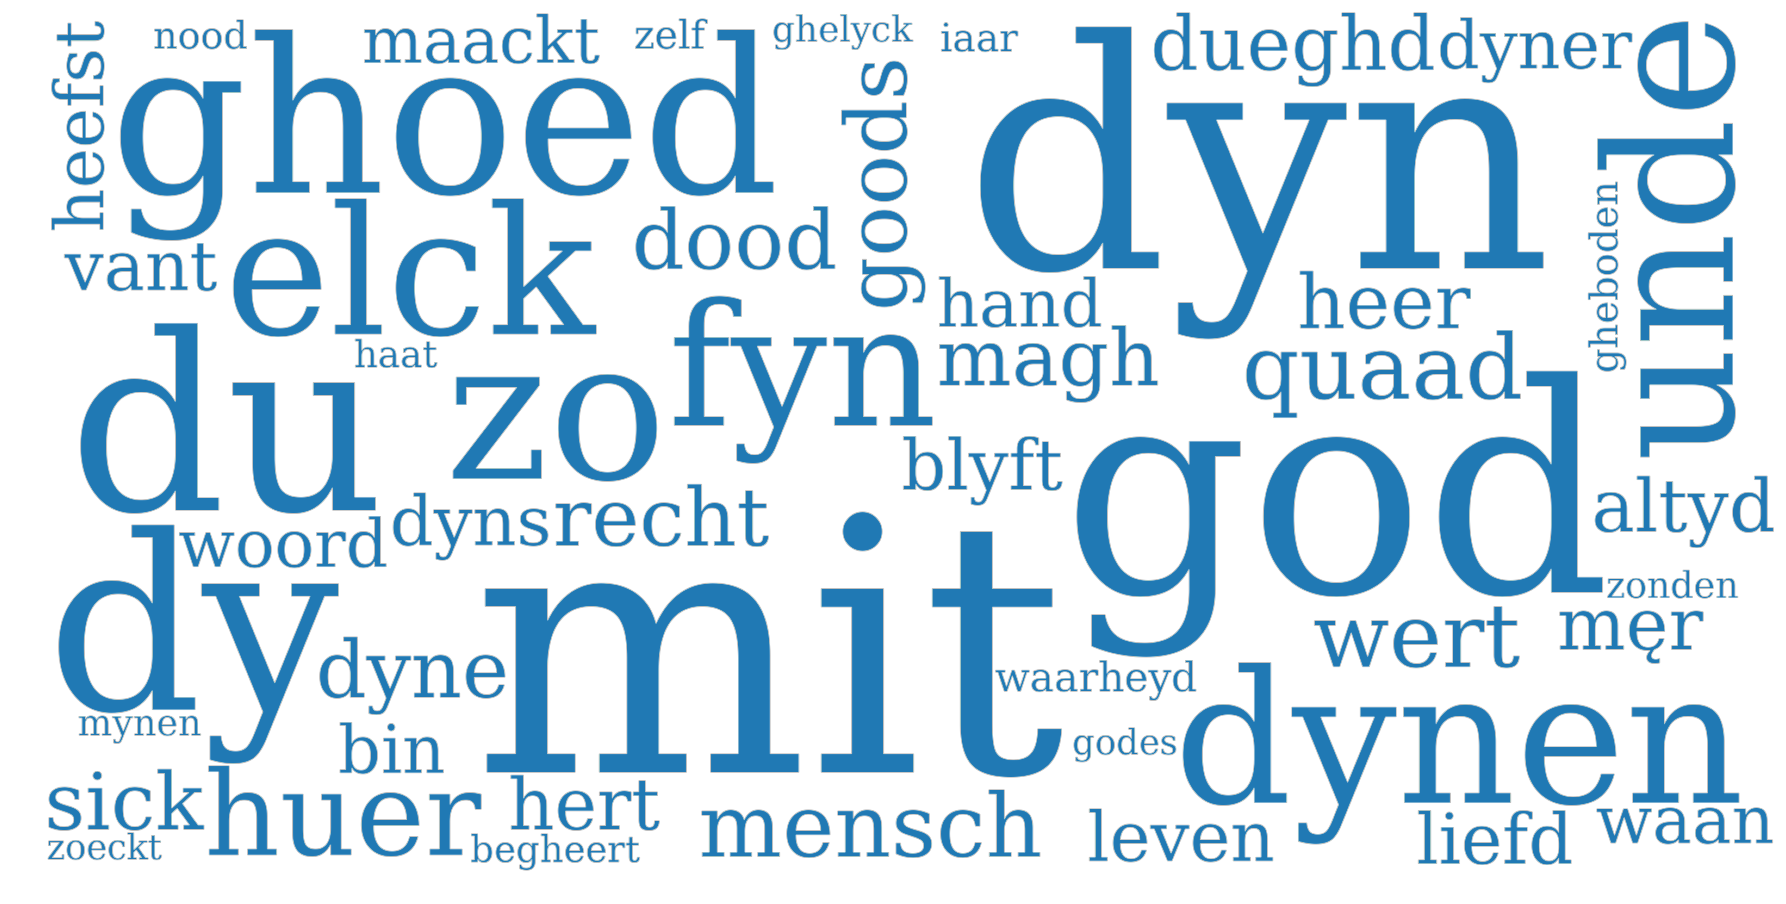

In [133]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

TOPIC_N = 47
NUMBER_OF_WORDS = 50
words = dict(lda.show_topic(TOPIC_N, NUMBER_OF_WORDS))
wc = WordCloud(width=3200, height=1600, background_color="rgba(255, 255, 255, 0)", mode="RGBA",
                              min_font_size=15,
                            font_path="/Users/alielassche/Downloads/DejaVuSerif.ttf", margin=10,
                               color_func=lambda *args, **kwargs: (32,121,180),
                              colormap='tab10')
wc.generate_from_frequencies(words)
plt.figure(figsize=(32,16))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
#plt.savefig('original_topic42.pdf', bbox_inches='tight')

In [40]:
lda.save('originalTM')

INFO : saving LdaMallet object under originalTM, separately None
INFO : saved originalTM


In [125]:
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda)

INFO : using serial LDA version on this node


In [132]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
vis

/Users/alielassche/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/Users/alielassche/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/Users/alielassche/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/Users/alielassche/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.230350  0.138728       1        1  3.970478
1     -0.167012  0.002173       2        1  1.483811
2      0.131945  0.107393       3        1  0.999411
3      0.040037 -0.007908       4        1  3.557065
4     -0.175297  0.161318       5        1  2.818691
5      0.081621  0.044629       6        1  0.676803
6     -0.047929 -0.159343       7        1  0.606754
7     -0.135079  0.008070       8        1  1.296282
8      0.220201 -0.025417       9        1  1.131057
9      0.243892  0.177799      10        1  2.743264
10    -0.035476 -0.105888      11        1  1.235097
11    -0.154601  0.101454      12        1  1.243407
12     0.078584 -0.183072      13        1  1.353587
13    -0.006052 -0.106555      14        1  3.347598
14     0.005788 -0.140277      15        1  2.385586
15    -0.014764  0.088542      16        1  1.620215
16     0.009250 -0.059471      17        1  0.499036
17     0.025616 -0.014233      18        1  1.112253
18     0.189912 -0.047976      19        1  2.993553
19    -0.024613  0.045843      20        1  1.123977
20     0.085561 -0.187532      21        1  0.775833
21    -0.045651  0.132086      22        1  4.173102
22    -0.065245  0.122991      23        1  2.517954
23    -0.100659  0.102621      24        1  2.338617
24    -0.227106  0.055844      25        1  4.060720
25    -0.148411  0.119319      26        1  2.358647
26    -0.182255  0.038737      27        1  4.850228
27    -0.185190  0.024780      28        1  2.448037
28     0.049751  0.123726      29        1  2.230780
29    -0.111969 -0.076166      30        1  1.753259
30     0.208919  0.176610      31        1  3.008488
31     0.017092 -0.125457      32        1  0.881891
32     0.067871 -0.102006      33        1  2.120758
33    -0.027312  0.014489      34        1  1.533488
34     0.084095 -0.091461      35        1  0.528751
35     0.018104  0.121861      36        1  1.210339
36    -0.162295 -0.066368      37        1  2.247798
37    -0.128294 -0.064180      38        1  1.190862
38    -0.007481 -0.148529      39        1  1.493245
39    -0.043407  0.103147      40        1  4.685525
40    -0.103899  0.034201      41        1  2.588354
41    -0.102565 -0.134920      42        1  1.116095
42    -0.205926  0.062481      43        1  3.981568
43    -0.003018 -0.172991      44        1  1.346008
44     0.172236  0.171046      45        1  1.990417
45     0.154161 -0.050810      46        1  0.457611
46     0.020722 -0.136858      47        1  0.928260
47     0.048229  0.096653      48        1  0.632831
48     0.131997 -0.199362      49        1  1.199911
49     0.295572  0.030243      50        1  3.152696, topic_info=     Category          Freq      Term         Total  loglift  logprob
term                                                                 
83    Default  21378.000000      godt  21378.000000  30.0000  30.0000
89    Default  20653.000000      heer  20653.000000  29.0000  29.0000
101   Default   8746.000000    liefde   8746.000000  28.0000  28.0000
16    Default  11974.000000       god  11974.000000  27.0000  27.0000
300   Default  11583.000000      hert  11583.000000  26.0000  26.0000
562   Default   6162.000000      lief   6162.000000  25.0000  25.0000
534   Default   4828.000000        zo   4828.000000  24.0000  24.0000
785   Default   4115.000000       hun   4115.000000  23.0000  23.0000
17    Default   8295.000000      gods   8295.000000  22.0000  22.0000
308   Default   3467.000000     liefd   3467.000000  21.0000  21.0000
477   Default   4784.000000       ook   4784.000000  20.0000  20.0000
387   Default   1985.000000        la   1985.000000  19.0000  19.0000
805   Default   3827.000000      laat   3827.000000  18.0000  18.0000
57    Default   7977.000000      ziel   7977.000000  17.0000  17.0000
313   Default   5396.000000       min   5396.000000  16.0000  16.0000
452   Defau

In [131]:
pyLDAvis.save_html(vis, 'original_lda.html')